Columns found: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Detected Life Expectancy column: Life expectancy 
Detected Status column: Status
Detected Alcohol column: Alcohol

------ T-TEST: Life Expectancy vs Status ------

H0: μDeveloped = μDeveloping
H1: μDeveloped ≠ μDeveloping

T-statistic = nan
P-value = nan
Conclusion: Fail to reject H0 — No significant difference.


------ CORRELATION: Alcohol vs Life Expectancy ------

H0: ρ = 0 (no correlation)
H1: ρ ≠ 0 (correlation exists)

Correlation coefficient (r) = 0.5692
P-value = 0.000020
Conclusion: Reject H0 — Significant correlation.



C:\Users\Dell\anaconda3\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


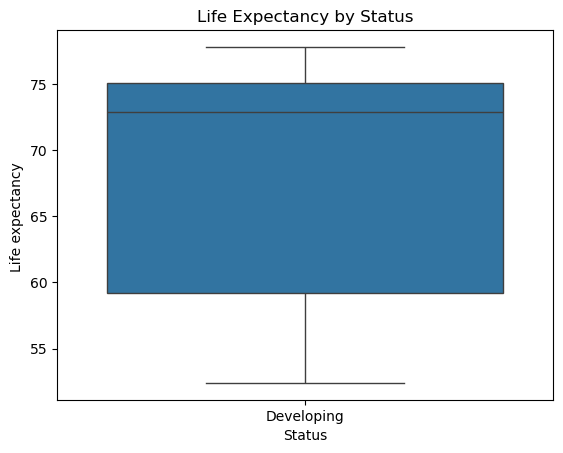

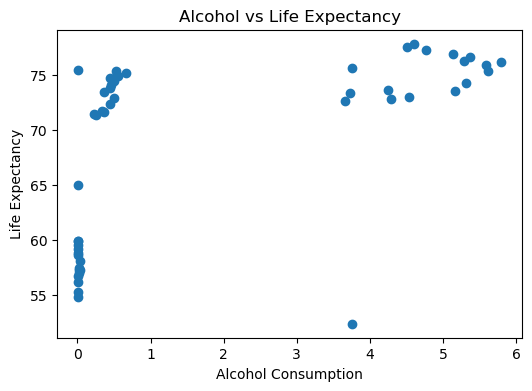


------ SUMMARY TABLE ------
          Test                        H0                        H1  Statistic  \
0       T-test  μDeveloped = μDeveloping  μDeveloped ≠ μDeveloping        NaN   
1  Correlation                     ρ = 0                     ρ ≠ 0   0.569249   

   p-value         Conclusion  
0      NaN  Fail to reject H0  
1  0.00002          Reject H0  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


df = pd.read_csv("C:/Users/Dell/Downloads/dataset.csv")
print("Columns found:", df.columns.tolist())



def find_col(df, keyword):
    """Finds column containing keyword (case-insensitive)."""
    cols = [c for c in df.columns if keyword.lower() in c.lower()]
    if len(cols) == 0:
        raise KeyError(f"No column found containing: {keyword}")
    return cols[0]


life_col = find_col(df, "life")             
status_col = find_col(df, "status")         
alcohol_col = find_col(df, "alcohol")       

print("Detected Life Expectancy column:", life_col)
print("Detected Status column:", status_col)
print("Detected Alcohol column:", alcohol_col)


print("\n------ T-TEST: Life Expectancy vs Status ------")

developed = df[df[status_col] == 'Developed'][life_col].dropna()
developing = df[df[status_col] == 'Developing'][life_col].dropna()

print("\nH0: μDeveloped = μDeveloping")
print("H1: μDeveloped ≠ μDeveloping\n")


t_stat, p_val = stats.ttest_ind(developed, developing, equal_var=False)

print(f"T-statistic = {t_stat:.4f}")
print(f"P-value = {p_val:.6f}")

alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject H0 — Significant difference.\n")
else:
    print("Conclusion: Fail to reject H0 — No significant difference.\n")


print("\n------ CORRELATION: Alcohol vs Life Expectancy ------")

corr_df = df[[life_col, alcohol_col]].dropna()

print("\nH0: ρ = 0 (no correlation)")
print("H1: ρ ≠ 0 (correlation exists)\n")

r, p_corr = stats.pearsonr(corr_df[alcohol_col], corr_df[life_col])

print(f"Correlation coefficient (r) = {r:.4f}")
print(f"P-value = {p_corr:.6f}")

if p_corr < alpha:
    print("Conclusion: Reject H0 — Significant correlation.\n")
else:
    print("Conclusion: Fail to reject H0 — No correlation.\n")

sns.boxplot(data=df, x=status_col, y=life_col)
plt.title("Life Expectancy by Status")
plt.savefig("boxplot_life_by_status.png")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df[alcohol_col], df[life_col])
plt.xlabel("Alcohol Consumption")
plt.ylabel("Life Expectancy")
plt.title("Alcohol vs Life Expectancy")
plt.savefig("scatter_alcohol_life.png")
plt.show()


summary = pd.DataFrame({
    "Test": ["T-test", "Correlation"],
    "H0": ["μDeveloped = μDeveloping", "ρ = 0"],
    "H1": ["μDeveloped ≠ μDeveloping", "ρ ≠ 0"],
    "Statistic": [t_stat, r],
    "p-value": [p_val, p_corr],
    "Conclusion": [
        "Reject H0" if p_val < 0.05 else "Fail to reject H0",
        "Reject H0" if p_corr < 0.05 else "Fail to reject H0"
    ]
})

print("\n------ SUMMARY TABLE ------")
print(summary)

summary.to_csv("hypothesis_summary.csv", index=False)


Step 1: Loading and Preparing Data...
Dropped 0 rows with missing values.
Data loaded and cleaned successfully.

Task 2: Regression (Predicting Life Expectancy)
Data split: 39 train samples, 10 test samples.
Linear Regression model fitted.

--- 🤖 Regression Model Summary & Evaluation 📊 ---
  R-squared (R²): 0.5178
  Mean Absolute Error (MAE): 2.4688
  Root Mean Squared Error (RMSE): 3.8840

Model Coefficients (Feature Importance):
                        Coefficient
GDP                       -2.759238
BMI                        0.563547
Schooling                  2.386401
Alcohol                    0.486800
Adult Mortality           -4.319890
percentage expenditure     3.422503
Total expenditure         -1.258364


Task 3: (Optional) Classification (High vs. Low)
Creating binary target: 'High' (1) if > 72.90 years, 'Low' (0) otherwise.
Classification data split: 39 train, 10 test.
Logistic Regression model fitted.

--- 🧠 Classification Model Results ---
  Accuracy: 0.7000

Classificati

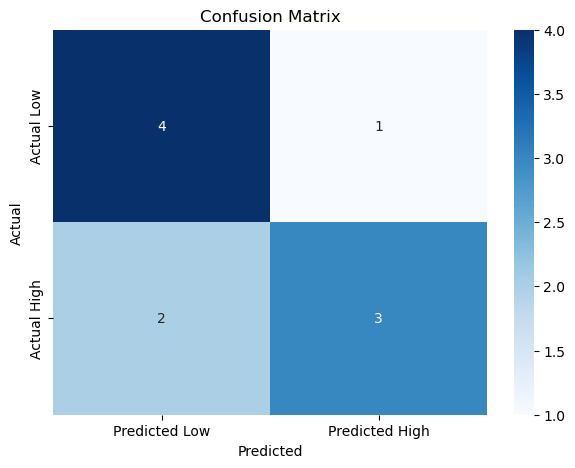


✅ Summary of Workflow (Member 4)
1. *Loaded Data*: Loaded 'Life Expectancy Data.csv'.
2. *Prepared Data*: Selected predictor and target columns, dropped rows with missing values.
3. *Regression Task*:
   - Split data (80% train, 20% test).
   - Scaled features using StandardScaler.
   - Fitted a Linear Regression model.
   - Evaluated model using R², MAE, and RMSE.
   - Displayed model coefficients.
4. *Classification Task (Optional)*:
   - Created a binary target ('High'/'Low') using a 72.90 year threshold.
   - Split and scaled data for classification (stratified split).
   - Fitted a Logistic Regression model.
   - Evaluated model using Accuracy, Classification Report, and a Confusion Matrix.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, 
    mean_absolute_error, 
    mean_squared_error, 
    accuracy_score, 
    confusion_matrix,
    classification_report
)
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# --- Configuration ---
# !! IMPORTANT: Update this with the actual path to your dataset
FILE_PATH = 'Life Expectancy Data.csv' 

# Define columns based on the prompt
# You can add/remove predictors here
PREDICTOR_COLS = [
    'GDP', 
    'BMI', 
    'Schooling', 
    'Alcohol',
    'Adult Mortality',
    'percentage expenditure',
    'Total expenditure'
]
TARGET_COL = 'Life expectancy'

# --- 1. Load and Prepare Data ---

print("Step 1: Loading and Preparing Data...")
try:
    # Load the dataset
    data = pd.read_csv("C:/Users/Dell/Downloads/dataset.csv")
    
    # Clean column names (remove leading/trailing spaces)
    data.columns = data.columns.str.strip()
    
    # Ensure target and predictors exist
    all_cols = PREDICTOR_COLS + [TARGET_COL]
    if not all(col in data.columns for col in all_cols):
        print(f"Error: Missing one or more columns in the CSV.")
        print(f"Required: {all_cols}")
        print(f"Found: {list(data.columns)}")
    else:
        # For simplicity, we drop rows with any missing values in our selected columns
        # A more advanced approach would use imputation
        original_rows = len(data)
        data = data[all_cols].dropna()
        print(f"Dropped {original_rows - len(data)} rows with missing values.")
        print("Data loaded and cleaned successfully.\n")

        # --- 2. Regression Task: Predicting Life Expectancy ---
        
        print("="*50)
        print("Task 2: Regression (Predicting Life Expectancy)")
        print("="*50)

        # Define features (X) and target (y)
        X = data[PREDICTOR_COLS]
        y = data[TARGET_COL]

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        print(f"Data split: {len(X_train)} train samples, {len(X_test)} test samples.")

        # Scale the features
        # Scaling is crucial for linear models, especially if predictors
        # are on different scales (like GDP vs. Alcohol)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Fit the Linear Regression model
        lr_model = LinearRegression()
        lr_model.fit(X_train_scaled, y_train)
        print("Linear Regression model fitted.")

        # Make predictions
        y_pred_lr = lr_model.predict(X_test_scaled)

        # Evaluate the model
        r2 = r2_score(y_test, y_pred_lr)
        mae = mean_absolute_error(y_test, y_pred_lr)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

        print("\n--- 🤖 Regression Model Summary & Evaluation 📊 ---")
        print(f"  R-squared (R²): {r2:.4f}")
        print(f"  Mean Absolute Error (MAE): {mae:.4f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Display model coefficients
        print("\nModel Coefficients (Feature Importance):")
        coeffs = pd.DataFrame(
            lr_model.coef_, 
            index=PREDICTOR_COLS, 
            columns=['Coefficient']
        )
        print(coeffs)
        print("\n")


        # --- 3. (Optional) Classification Task: High vs. Low Life Expectancy ---
        
        print("="*50)
        print("Task 3: (Optional) Classification (High vs. Low)")
        print("="*50)

        # Create a binary target variable
        # We'll use the median of the entire dataset's life expectancy as the threshold
        threshold = y.median()
        y_class = (y > threshold).astype(int)  # 1 = High, 0 = Low
        
        print(f"Creating binary target: 'High' (1) if > {threshold:.2f} years, 'Low' (0) otherwise.")

        # Split data for classification
        # We use 'stratify=y_class' to ensure both train and test sets
        # have a similar proportion of High/Low classes.
        X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
            X, y_class, test_size=0.2, random_state=42, stratify=y_class
        )
        
        print(f"Classification data split: {len(X_train_c)} train, {len(X_test_c)} test.")

        # Scale the features for the classification model
        scaler_c = StandardScaler()
        X_train_c_scaled = scaler_c.fit_transform(X_train_c)
        X_test_c_scaled = scaler_c.transform(X_test_c)

        # Apply Logistic Regression
        log_model = LogisticRegression(random_state=42)
        log_model.fit(X_train_c_scaled, y_train_c)
        print("Logistic Regression model fitted.")

        # Make predictions
        y_pred_log = log_model.predict(X_test_c_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test_c, y_pred_log)
        cm = confusion_matrix(y_test_c, y_pred_log)

        print("\n--- 🧠 Classification Model Results ---")
        print(f"  Accuracy: {accuracy:.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test_c, y_pred_log, target_names=['Low (0)', 'High (1)']))

        print("\nConfusion Matrix:")
        # Plot confusion matrix
        plt.figure(figsize=(7, 5))
        sns.heatmap(
            cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'], 
            yticklabels=['Actual Low', 'Actual High']
        )
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


        # --- 4. Summary of Workflow ---
        print("\n" + "="*50)
        print("✅ Summary of Workflow (Member 4)")
        print("="*50)
        print("1. *Loaded Data*: Loaded 'Life Expectancy Data.csv'.")
        print("2. *Prepared Data*: Selected predictor and target columns, dropped rows with missing values.")
        print("3. *Regression Task*:")
        print("   - Split data (80% train, 20% test).")
        print("   - Scaled features using StandardScaler.")
        print("   - Fitted a Linear Regression model.")
        print("   - Evaluated model using R², MAE, and RMSE.")
        print("   - Displayed model coefficients.")
        print("4. *Classification Task (Optional)*:")
        print(f"   - Created a binary target ('High'/'Low') using a {threshold:.2f} year threshold.")
        print("   - Split and scaled data for classification (stratified split).")
        print("   - Fitted a Logistic Regression model.")
        print("   - Evaluated model using Accuracy, Classification Report, and a Confusion Matrix.")

except FileNotFoundError:
    print(f"Error: The file '{FILE_PATH}' was not found.")
    print("Please make sure the file is in the same directory as the script or update the FILE_PATH variable.")
except Exception as e:
    print(f"An error occurred: {e}")